In [30]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os 
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
path=os.getcwd()
img=path+'/NoisyImage1.jpg'
img=mpimg.imread(img)

img2=path+'/NoisyImage2.jpg'
img2=mpimg.imread(img2)
#print the shape of original image 
print(img.shape)
kernel_size=3

(408, 408)


**=====Mean Filter Kernel Size is 3=====**


kernel size is: 3
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


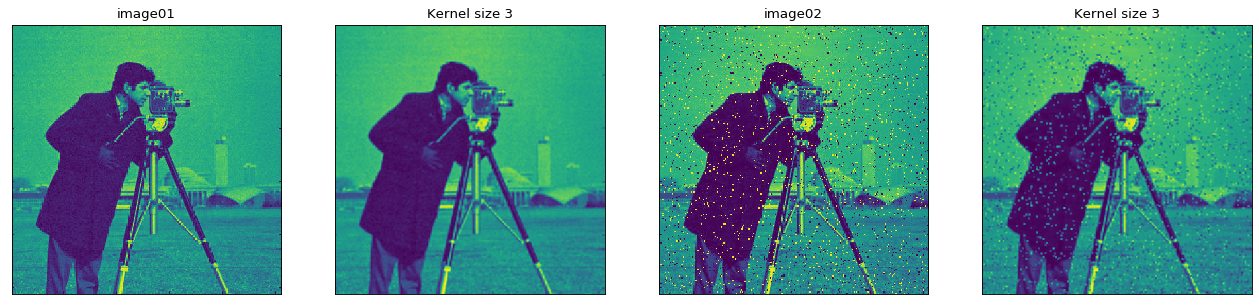

In [31]:
#when kernel size is 3
print('kernel size is:' ,kernel_size)
kernel=(1/kernel_size**2)*np.ones((kernel_size,kernel_size))
print(kernel)
# the final image where the kenrnel size is 3 
dst = cv.filter2D(img, -1, kernel)
dst2 = cv.filter2D(img2, -1, kernel)

figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(141),plt.imshow(img),plt.title('image01')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(dst),plt.title('Kernel size 3')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(img2),plt.title('image02')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(dst2),plt.title('Kernel size 3')
plt.xticks([]), plt.yticks([])
plt.show()


**====Mean Filter Kernel Size is 4=====**

kernel size is: 8
[[0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625]
 [0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625]
 [0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625]
 [0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625]
 [0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625]
 [0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625]
 [0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625]
 [0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625]]


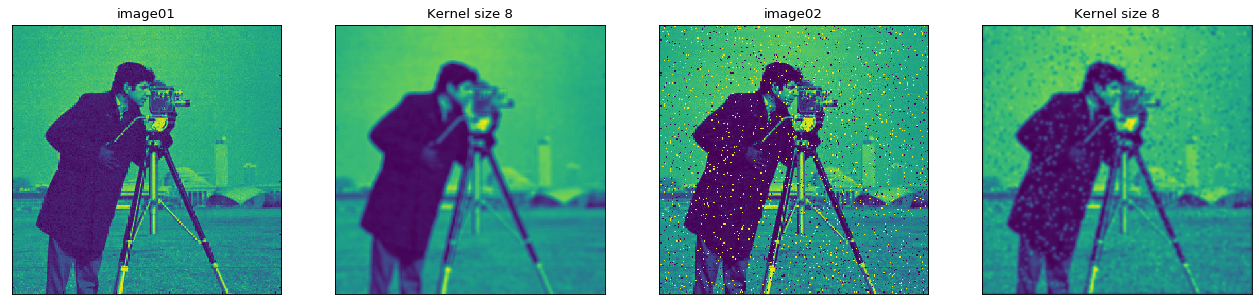

In [28]:
kernel_size=8
print('kernel size is:' ,kernel_size)
kernel=(1/kernel_size**2)*np.ones((kernel_size,kernel_size))
print(kernel)
# the final image where the kenrnel size is 4 


figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k') 
dst = cv.filter2D(img, -1, kernel)
plt.subplot(141),plt.imshow(img),plt.title('image01')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(dst),plt.title('Kernel size 8')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(img2),plt.title('image02')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(dst2),plt.title('Kernel size 8')
plt.xticks([]), plt.yticks([])
plt.show()

## Concolusion
For the image01, the kernel size 3 performs better than the mean filter kernel size 8. Filter Kernel size 8 is more blurer.

For hte image02, the kernel size 8 smoother than the kernel size 3, but is blurer. 

# **====2: Guassian Filter====**

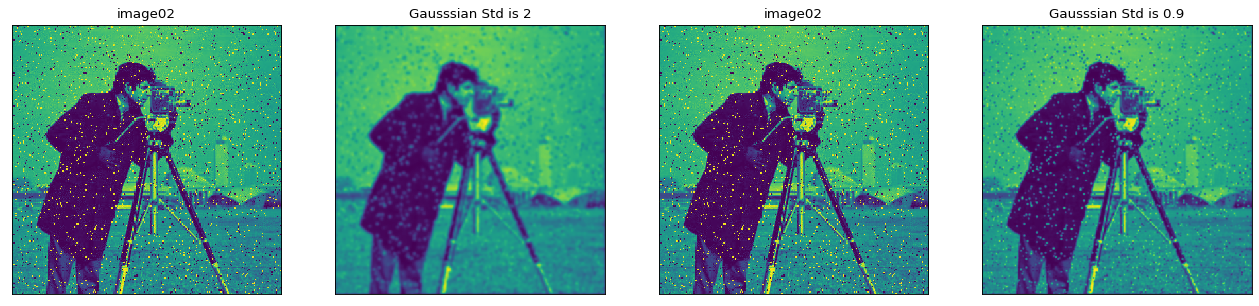

In [38]:
def gaussian_kernel(width,std):
    result=[]
    mu=width/2-1
    for i in range(width):
        result.append((1/(std*np.sqrt(2*3.14)))*np.exp(-0.5*((i-mu)/std)**2))
    return result

mask=gaussian_kernel(10,0.9)

dst2=img2.copy()
dst=img2.copy()
new_dst=np.ones(img.shape)

for i in range(len(img)):
    new_dst[i]=np.convolve(img2[i],mask,'same')

#convolve mask with column
dst2=np.ones(img.shape)
for j in range(len(img[0])):
    dst2[:,j]=np.convolve(new_dst[:,j],mask,'same')


mask=gaussian_kernel(10,2)
new_dst=np.ones(img.shape)
for i in range(len(img)):
    new_dst[i]=np.convolve(img2[i],mask,'same')

#convolve mask with column
for j in range(len(img[0])):
    dst[:,j]=np.convolve(new_dst[:,j],mask,'same')

figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')   
plt.subplot(141),plt.imshow(img2),plt.title('image02')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(dst),plt.title('Gausssian Std is 2')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(img2),plt.title('image02')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(dst2),plt.title('Gausssian Std is 0.9')
plt.xticks([]), plt.yticks([])
plt.show()



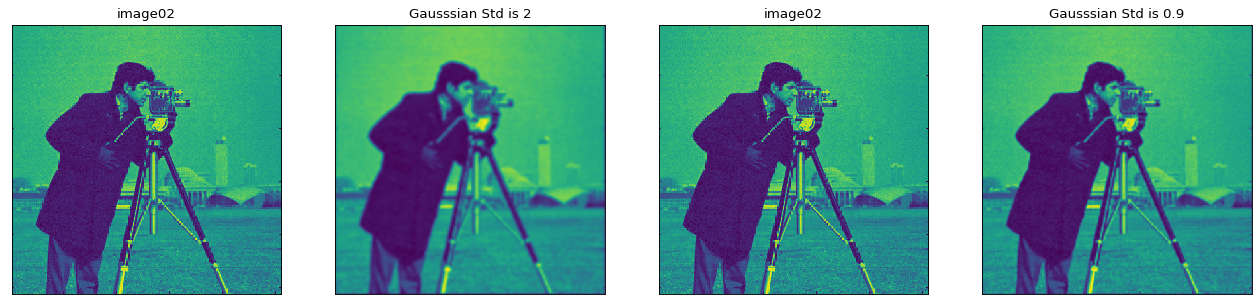

In [39]:
def gaussian_kernel(width,std):
    result=[]
    mu=width/2-1
    for i in range(width):
        result.append((1/(std*np.sqrt(2*3.14)))*np.exp(-0.5*((i-mu)/std)**2))
    return result

mask=gaussian_kernel(10,0.9)

dst2=img.copy()
dst=img.copy()
new_dst=np.ones(img.shape)

for i in range(len(img)):
    new_dst[i]=np.convolve(img[i],mask,'same')

#convolve mask with column
dst2=np.ones(img.shape)
for j in range(len(img[0])):
    dst2[:,j]=np.convolve(new_dst[:,j],mask,'same')


mask=gaussian_kernel(10,2)
new_dst=np.ones(img.shape)
for i in range(len(img)):
    new_dst[i]=np.convolve(img[i],mask,'same')

#convolve mask with column
for j in range(len(img[0])):
    dst[:,j]=np.convolve(new_dst[:,j],mask,'same')

figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')   
plt.subplot(141),plt.imshow(img),plt.title('image02')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(dst),plt.title('Gausssian Std is 2')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(img),plt.title('image02')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(dst2),plt.title('Gausssian Std is 0.9')
plt.xticks([]), plt.yticks([])
plt.show()

    
    
    

# Conclusion:
For both Image 1 and imag 2, when standard deviation is small. the image is clearer but not smooth. When standard deviation is large, it removes more noises but image itself becomes blurer. 




# **=====3: Median Filter=====**

1: Median Filter Size is 5

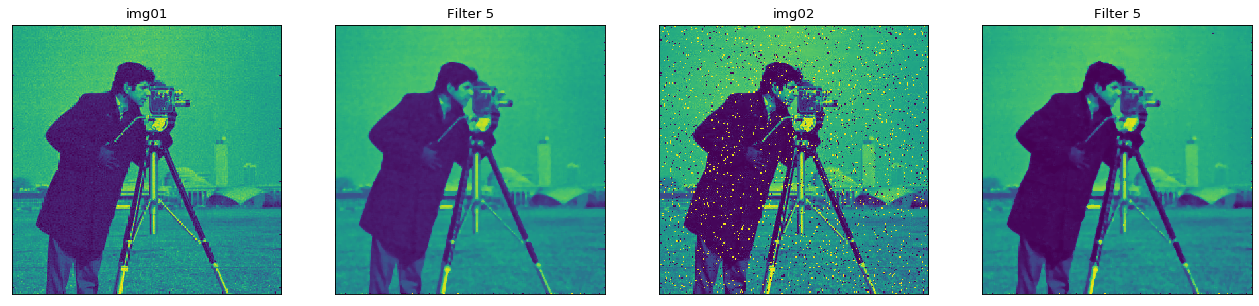

In [40]:
#Median filter
dst=img2.copy()
dst2=img2.copy()

height=dst.shape[0]
width=dst.shape[1]

#Median Filter Window Size is 5
for i in range(2,width-2):
    for j in range(2,height-2):
        kernel=[]
        for k in range(-2,3):
            for p in range(-2,3):
                temp=img.item(i+k,j+p)
                kernel.append(temp)
        kernel.sort()
        median=kernel[12]
        a=median
        dst.itemset((i,j),a)
        
#Median Filter Window Size is 5
for i in range(2,width-2):
    for j in range(2,height-2):
        kernel=[]
        for k in range(-2,3):
            for p in range(-2,3):
                temp=img2.item(i+k,j+p)
                kernel.append(temp)
        kernel.sort()
        median=kernel[12]
        a=median
        dst2.itemset((i,j),a)

figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')        
plt.subplot(141),plt.imshow(img),plt.title('img01')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(dst),plt.title('Filter 5')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(img2),plt.title('img02')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(dst2),plt.title('Filter 5')
plt.xticks([]), plt.yticks([])
plt.show()

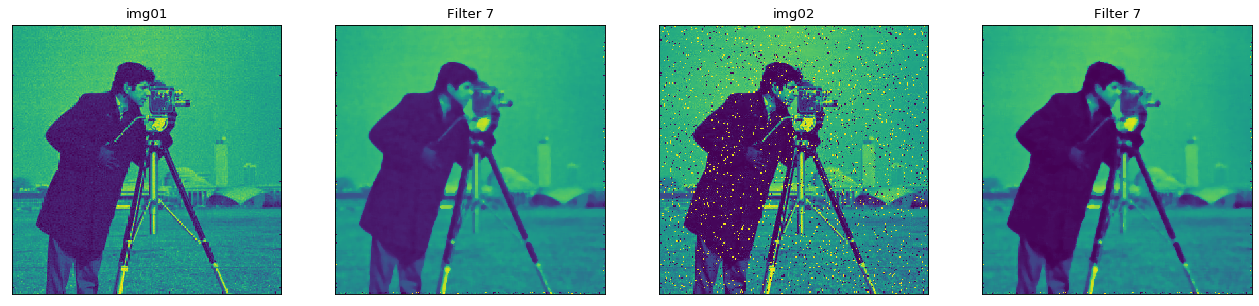

In [42]:
#Median filter
dst=img2.copy()
dst2=img2.copy()

height=dst.shape[0]
width=dst.shape[1]

#Median Filter Window Size is 7
for i in range(3,width-3):
    for j in range(3,height-3):
        kernel=[]
        for k in range(-3,4):
            for p in range(-3,4):
                temp=img.item(i+k,j+p)
                kernel.append(temp)
        kernel.sort()
        median=kernel[24]
        a=median
        dst.itemset((i,j),a)
        
#Median Filter Window Size is 5
for i in range(3,width-3):
    for j in range(3,height-3):
        kernel=[]
        for k in range(-3,4):
            for p in range(-3,4):
                temp=img2.item(i+k,j+p)
                kernel.append(temp)
        kernel.sort()
        median=kernel[24]
        a=median
        dst2.itemset((i,j),a)

figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')        
plt.subplot(141),plt.imshow(img),plt.title('img01')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(dst),plt.title('Filter 7')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(img2),plt.title('img02')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(dst2),plt.title('Filter 7')
plt.xticks([]), plt.yticks([])
plt.show()

## Conclusion:
for the median filter, when kernel filter size is larger, the image is smoother. 

For image 1, samller size filter is clearer than lager size filter. But larger size filter is smoother.

For image 2, larger filter removes more noises but becomes blurer. 

# Final Conclusion:

For the noises removement, median filter performs the best in those cases.

For the issue of smooth of the image, when filter size is smaller, the image is clearer but not smoother. 